In [1]:
import pandas as pd
from scipy.stats import shapiro, mannwhitneyu
from statsmodels.tsa.stattools import adfuller

In [3]:
indice_glp = pd.read_csv('indices_glp.csv')

In [4]:
# Normalidade dos dados de Venda
stat, p = shapiro(indice_glp['Valor de Venda'])
print('Estatística do teste:', stat)
print('p-valor:', p)
if p < 0.05:
    print('Os dados não são normalmente distribuídos')
else:
    print('Os dados são normalmente distribuídos')

Estatística do teste: 0.7982444763183594
p-valor: 0.0
Os dados não são normalmente distribuídos


c:\Users\mclar\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


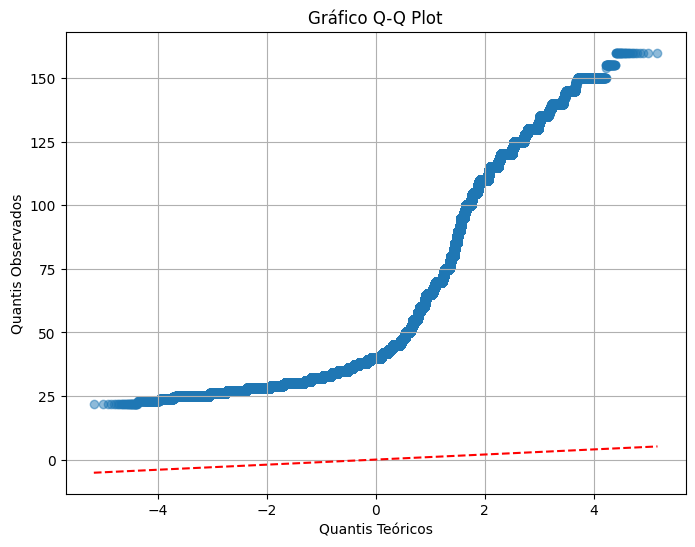

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

quantis_teoricos, quantis_observados = probplot(indice_glp['Valor de Venda'], dist='norm', fit=False)

plt.figure(figsize=(8, 6))
plt.scatter(quantis_teoricos, quantis_observados, alpha=0.5)
plt.plot(quantis_teoricos, quantis_teoricos, color='red', linestyle='--')
plt.title('Gráfico Q-Q Plot')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Observados')
plt.grid(True)
plt.show()

In [6]:
# Tendência dos dados de Venda
trend_stat, p_trend = mannwhitneyu(indice_glp['Ano'], indice_glp['Valor de Venda'])
print('Estatística do teste de tendência:', trend_stat)
print('p-valor:', p_trend)
if p_trend < 0.05:
    print('Os dados têm tendência')
else:
    print('Os dados não têm tendência')

Estatística do teste de tendência: 34320592790884.0
p-valor: 0.0
Os dados têm tendência


In [7]:
media_valor_venda_por_ano = indice_glp.groupby('Ano')['Valor de Venda'].mean()

# Aplicar o teste Dickey-Fuller aumentado na série de médias
adf_stat, p_adf, _, _, _, _ = adfuller(media_valor_venda_por_ano)
print('Estatística do teste Dickey-Fuller:', adf_stat)
print('p-valor:', p_adf)
if p_adf < 0.05:
    print('Os dados não são estacionários')
else:
    print('Os dados são estacionários')

Estatística do teste Dickey-Fuller: 0.6604896106228997
p-valor: 0.9890154736061885
Os dados são estacionários
